# Imports

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset

In [16]:
df = pd.read_csv("../data/processed/municipalities_connectivity_processed.csv")
df.head()

,year,state,state_name,municipality_id,municipality_name,ibc,coverage_4g5g,fibra,density_smp,hhi_smp,density_scm,hhi_scm,stations_density,region,fiber_cat,ibc_decile
0,2024,RO,Rondônia,1100296,Santa Luzia D'Oeste,49.92,62.9831,100,44.00,51,23.87,47,25.39,N,full,5
1,2024,AC,Acre,1200351,Marechal Thaumaturgo,16.28,30.3470,0,36.72,16,8.04,33,8.36,N,none,1
2,2024,AM,Amazonas,1300839,Caapiranga,29.17,50.9133,50,26.62,7,0.65,71,17.47,N,partial,1
3,2024,AM,Amazonas,1302207,Juruá,20.06,53.3310,0,36.33,36,5.85,19,13.45,N,none,1
4,2024,PA,Pará,1501204,Baião,34.08,52.8200,100,20.46,15,2.85,52,6.26,N,full,2


# Count municipalities per decile per year

In [17]:
df.groupby(["year", "ibc_decile"]).size().unstack()

ibc_decile,1,2,3,4,5,6,7,8,9,10
year,,,,,,,,,,
2021,557,557,557,557,557,557,557,557,557,557
2022,557,557,557,557,557,557,557,557,557,557
2023,557,557,557,557,557,557,557,557,557,557
2024,557,557,557,557,557,557,557,557,557,557


# Create decile summary table

In [18]:
decile_means = (
    df.groupby(["year", "ibc_decile"])["ibc"]
      .mean()
      .reset_index()
)
decile_means.head()

,year,ibc_decile,ibc
0,2021,1,23.722890
1,2021,2,36.325332
2,2021,3,44.491113
3,2021,4,48.597451
4,2021,5,51.536589


# Pivot table

In [19]:
pivot = decile_means.pivot(index="year", columns="ibc_decile", values="ibc")
pivot

ibc_decile,1,2,3,4,5,6,7,8,9,10
year,,,,,,,,,,
2021,23.722890,36.325332,44.491113,48.597451,51.536589,54.273285,56.850736,59.542370,62.518689,67.589048
2022,24.380916,34.010952,43.110215,49.628977,53.660251,56.847899,59.777217,62.648582,65.723232,70.800197
2023,24.932549,34.810467,43.761813,50.319390,54.317684,57.605314,60.596858,63.312926,66.153950,70.412908
2024,26.048133,35.804668,41.446786,46.082280,50.612675,55.181508,59.595601,64.022603,68.834183,76.365583


# Compute top vs bottom gap

In [20]:
pivot["gap_top_bottom"] = pivot[10] - pivot[1]
pivot[["gap_top_bottom"]]

ibc_decile,gap_top_bottom
year,
2021,43.866158
2022,46.419282
2023,45.480359
2024,50.317451


# Plot gap evolution

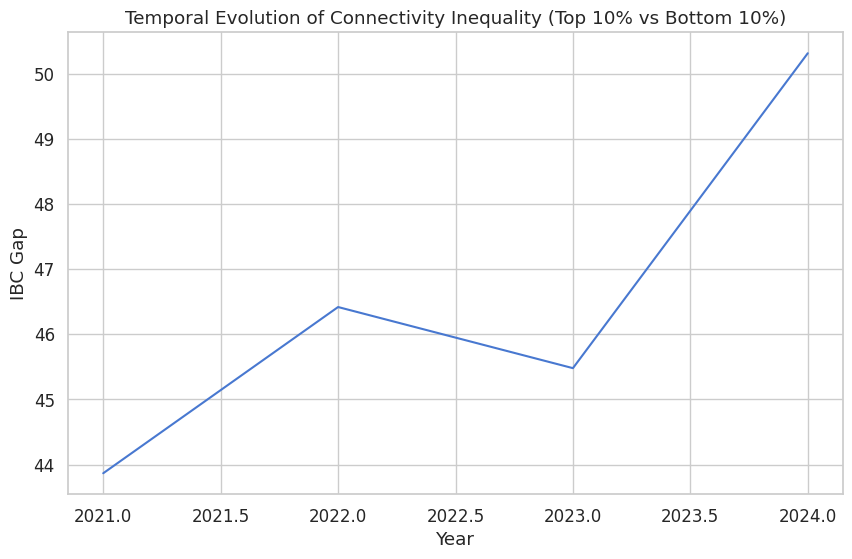

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=pivot["gap_top_bottom"])
plt.title("Temporal Evolution of Connectivity Inequality (Top 10% vs Bottom 10%)")
plt.xlabel("Year")
plt.ylabel("IBC Gap")
plt.grid(True)
plt.savefig("../reports/figures/inequality/gap_top_bottom.png", dpi=300)
plt.show()

# Plot all decile curves

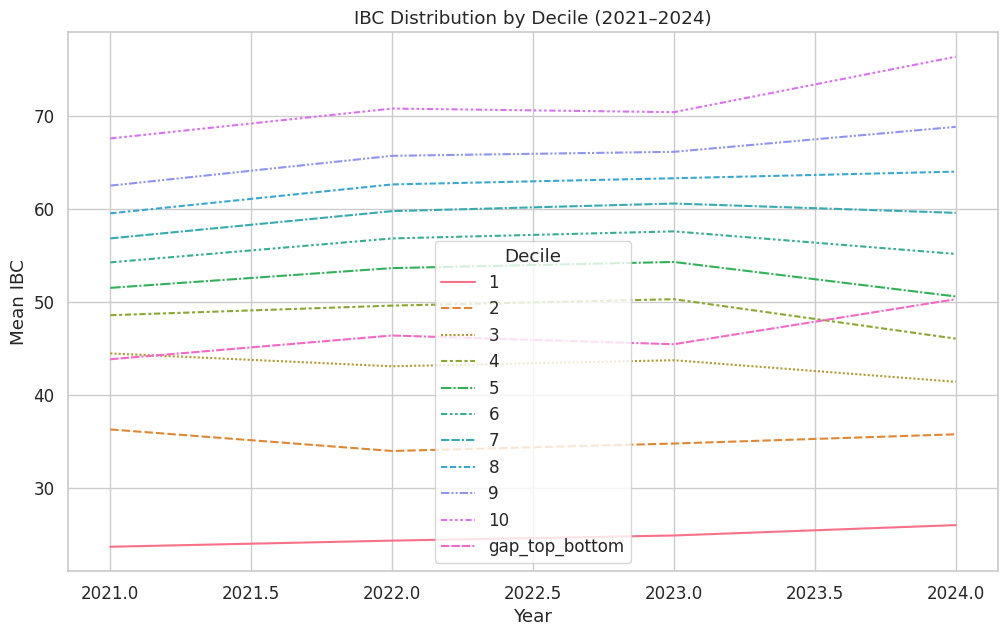

In [22]:
plt.figure(figsize=(12,7))
sns.lineplot(data=pivot)
plt.title("IBC Distribution by Decile (2021–2024)")
plt.xlabel("Year")
plt.ylabel("Mean IBC")
plt.legend(title="Decile")
plt.grid(True)
plt.savefig("../reports/figures/inequality/decile_evolution.png", dpi=300)
plt.show()


# Decile gap by region

In [23]:
region_gap = (
    df.groupby(["year", "region", "ibc_decile"])["ibc"]
      .mean()
      .reset_index()
      .pivot_table(index=["year", "region"], columns="ibc_decile", values="ibc")
)

region_gap["gap"] = region_gap[10] - region_gap[1]
region_gap

ibc_decile           1          2          3          4          5          6  \
year region                                                                     
2021 CO      23.914211  37.008986  44.060270  48.467879  51.508200  54.175152   
     N       23.490789  36.268676  44.585357  48.471053  51.432432  54.249565   
     NE      23.436271  36.831921  44.448655  48.642677  51.498850  54.166994   
     S       23.996129  37.329032  44.754250  48.565175  51.538450  54.282013   
     SE      25.097042  35.135062  44.480303  48.633095  51.654522  54.421026   
2022 CO      22.918913  34.704643  42.257069  49.604848  53.753191  56.921311   
     N       23.549328  33.763684  43.580508  49.563378  53.634167  56.795000   
     NE      24.363763  33.576075  43.474462  49.549424  53.522899  56.740118   
     S       26.756552  34.558125  43.353433  49.846186  53.810455  56.889720   
     SE      25.886471  34.537044  42.320265  49.767759  53.766196  56.913176   
2023 CO      23.175000  35.018750  42.323654  50.165455  54.351200  57.699385   
     N       24.041210  34.280612  44.317231  50.287681  54.107347  57.609250   
     NE      25.045116  34.560789  44.273359  50.250034  54.218455  57.590621   
     S       27.335517  35.286889  43.758571  50.581863  54.451818  57.519267   
     SE      26.256721  35.200000  42.881111  50.329048  54.502418  57.669149   
2024 CO      27.161887  35.595000  41.346667  46.132909  50.625000  55.045469   
     N       23.651370  35.755921  41.398551  45.750820  50.697500  54.802400   
     NE      26.635842  35.765017  41.381475  46.054841  50.433455  55.087676   
     S       28.548889  35.742250  41.746038  46.125600  50.690086  55.350355   
     SE      27.575918  36.160357  41.537232  46.267368  50.768824  55.264155   

ibc_decile           7          8          9         10        gap  
year region                                                         
2021 CO      56.704151  59.424821  62.594615  67.470769  43.556559  
     N       56.715882  59.486000  62.356842  66.127273  42.636483  
     NE      56.713197  59.379296  62.737344  67.316842  43.880571  
     S       56.896185  59.515697  62.415061  68.064129  44.068000  
     SE      56.949583  59.639061  62.530185  67.462532  42.365490  
2022 CO      59.691857  62.526500  65.421538  69.881200  46.962287  
     N       59.950667  62.780000  65.792105  69.435556  45.886228  
     NE      59.684020  62.758533  65.788276  70.060811  45.697048  
     S       59.759172  62.632558  65.722289  71.260119  44.503567  
     SE      59.856468  62.648559  65.748109  70.754119  44.867649  
2023 CO      60.597313  63.462295  65.921136  69.928095  46.753095  
     N       60.810714  63.317500  66.413571  69.272000  45.230790  
     NE      60.429612  63.272692  66.300000  69.765938  44.720821  
     S       60.630608  63.233310  66.012159  70.765029  43.429511  
     SE      60.639010  63.333154  66.241754  70.352320  44.095598  
2024 CO      59.736111  64.143714  68.450000  74.977143  47.815256  
     N       59.036500  63.544444  69.340000  72.970000  49.318630  
     NE      59.330984  63.865357  68.665238  76.040741  49.404899  
     S       59.581386  63.887592  68.813229  76.566633  48.017744  
     SE      59.791692  64.186723  68.907302  76.340781  48.764863

# Plot region gap over time

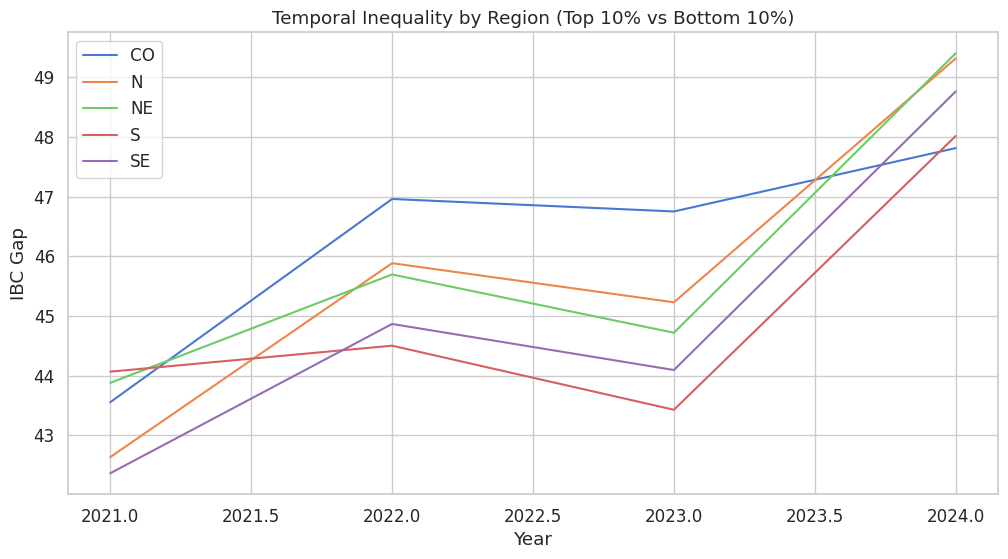

In [24]:
plt.figure(figsize=(12,6))
for region in region_gap.index.levels[1]:
    data = region_gap.xs(region, level="region")
    plt.plot(data.index, data["gap"], label=region)

plt.title("Temporal Inequality by Region (Top 10% vs Bottom 10%)")
plt.xlabel("Year")
plt.ylabel("IBC Gap")
plt.legend()
plt.grid(True)
plt.savefig("../reports/figures/inequality/region_gap.png", dpi=300)
plt.show()